In [28]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import groupby
from collections import Counter


# configuração output dos plots
plt.rcParams['figure.figsize'] = [14, 6]
plt.rcParams['figure.dpi'] = 100
sns.set_context('notebook')

influenza = open('sequence_influ.fasta').read()
influenza = influenza[104:]
#print(influenza)

covid = open('sequence_covid.fasta').read()
covid = covid[97:]
#print(covid)


In [2]:
influenza = influenza.replace("\n","")
pares = []
for i in range(len(influenza)-1):
  pares.append(influenza[i])

pares_1 = []
for i in range(len(influenza)-1):
  pares_1.append(influenza[i+1])

#print((pares))

#print(pares_1)

In [3]:
covid = covid.replace("\n","")
covid_pares = []
for i in range(len(covid)-1):
  covid_pares.append(covid[i])

covid_pares_1 = []
for i in range(len(covid)-1):
  covid_pares_1.append(covid[i+1])

#print((pares))

#print(pares_1)

In [8]:
#dataset dos pares
df= pd.DataFrame({"x": pares, "y": pares_1})
# cria matriz 
df2 = pd.crosstab(df['x'], df['y'], margins=False)
print(df2)


y    A   C    G    T
x                   
A  174  75  144  118
C  128  69   37   68
G  160  77  109   62
T   49  82  117   71


In [7]:
#dataset dos pares
covid_df= pd.DataFrame({"x": covid_pares, "y": covid_pares_1})
# cria matriz 
covid_df2 = pd.crosstab(covid_df['x'], covid_df['y'], margins=False)
print(covid_df2)

y     A     C     G     T
x                        
A  2880  2023  1742  2308
C  2084   888   439  2081
G  1612  1168  1093  1990
T  2377  1413  2589  3215


Text(0.5, 1.0, 'Covid-19')

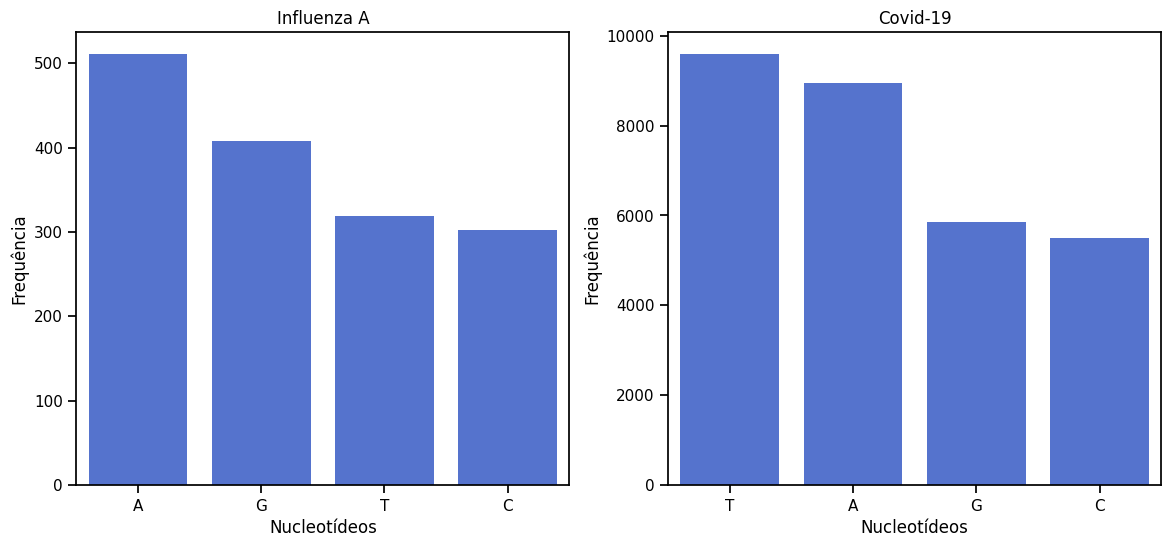

In [42]:
plt.subplot(1, 2, 1)
sns.countplot(x = 'x', data = df, color = 'royalblue', order=df['x'].value_counts().index)
plt.xlabel('Nucleotídeos'); plt.ylabel('Frequência')
plt.title("Influenza A")
plt.subplot(1, 2, 2)
sns.countplot(x = 'x', data = covid_df, color = 'royalblue', order=covid_df['x'].value_counts().index)
plt.xlabel('Nucleotídeos'); plt.ylabel('Frequência')
plt.title("Covid-19")

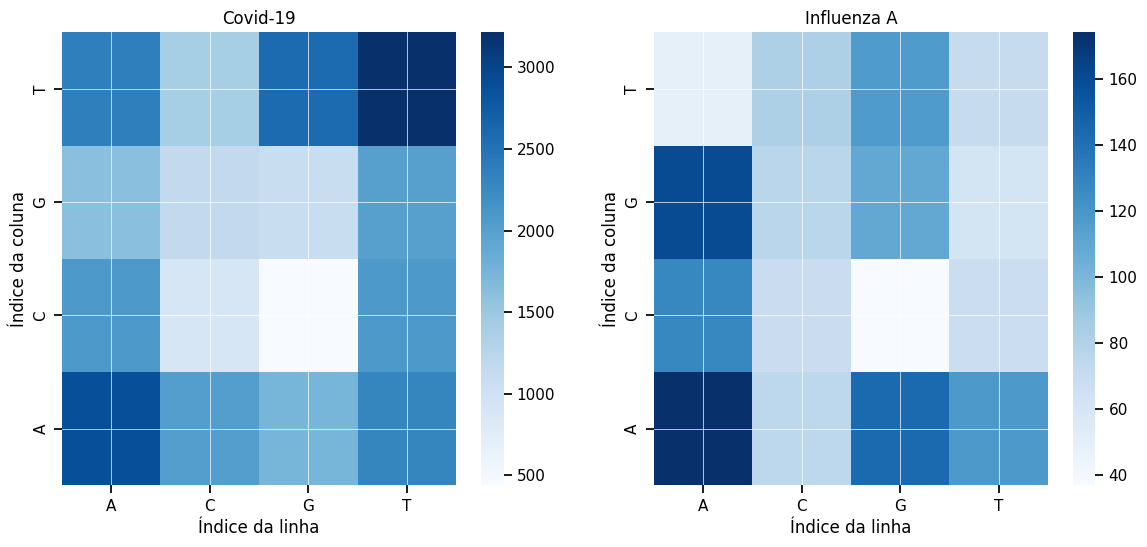

In [35]:
plt.subplot(1, 2, 1)
ax = sns.heatmap(covid_df2, cmap = 'Blues')
plt.xlabel('Índice da linha'); plt.ylabel('Índice da coluna')
plt.title("Covid-19")
ax.invert_yaxis()
ax.grid(visible=True, color='white', linewidth=0.5)

plt.subplot(1, 2, 2)
ax = sns.heatmap(df2, cmap = 'Blues')
plt.xlabel('Índice da linha'); plt.ylabel('Índice da coluna')
plt.title("Influenza A")
ax.invert_yaxis()
ax.grid(visible=True, color='white', linewidth=0.5)